In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
videoFile = "videos/neutral/neutral1.mp4"
cap = cv2.VideoCapture(videoFile)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
draw_landmarks(frame, results)

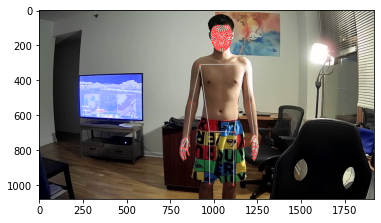

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [9]:
result_test = extract_keypoints(results)

In [10]:
result_test

array([ 0.5441519 ,  0.14834426, -0.49086377, ...,  0.44730979,
        0.76494634, -0.00980538])

In [11]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data') 

# Actions that we try to detect
actions = np.array(['neutral', '10%-20%', '30%-50%', '60%-80%','100%'])

# Thirty videos worth of data
data_folder = "videos"

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

In [12]:
for action in actions: 
    try: 
        os.makedirs(os.path.join(DATA_PATH, action))
    except:
        pass

In [ ]:
def captureVideo()

In [25]:
for i in data_folder:
    for j in actions:
        counter=0
        videoFile = data_folder+"/"+j+"/"+"neutral1.mp4"
        cap = cv2.VideoCapture(videoFile)
        # Set mediapipe model 
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            # Loop through video length aka sequence length
            while(cap.isOpened()):
                counter+=1
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video {}'.format(j, videoFile), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video {}'.format(j, videoFile), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, j, str(counter))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

            cap.release()
            cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        if action == '10%-20%':
        # Loop through sequences aka videos
            for sequence in range(start_folder, start_folder+no_sequences):
                # Loop through video length aka sequence length
                for frame_num in range(sequence_length):

                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_landmarks(image, results)

                    # NEW Apply wait logic
                    if frame_num == 0: 
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow('OpenCV Feed', image)

                    # NEW Export keypoints
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Break gracefully
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'neutral': 0, '10%-20%': 1, '30%-50%': 2, '60%-80%': 3, '100%': 4}

In [30]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
X = np.array(sequences)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [35]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [36]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
8/8 [==============================] - 2s 66ms/step - loss: 1.6441 - categorical_accuracy: 0.1899
Epoch 2/2000
8/8 [==============================] - 0s 35ms/step - loss: 1.7097 - categorical_accuracy: 0.2363
Epoch 3/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.7428 - categorical_accuracy: 0.2321
Epoch 4/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5002 - categorical_accuracy: 0.2152
Epoch 5/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.2756 - categorical_accuracy: 0.3671
Epoch 6/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.1515 - categorical_accuracy: 0.5738
Epoch 7/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.9669 - categorical_accuracy: 0.3080
Epoch 8/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.6108 - categorical_accuracy: 0.1983
Epoch 9/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6108 - categorical_accuracy: 0.1983
E

8/8 [==============================] - 0s 36ms/step - loss: 1.6095 - categorical_accuracy: 0.2068
Epoch 147/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6093 - categorical_accuracy: 0.2068
Epoch 148/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6094 - categorical_accuracy: 0.2068
Epoch 149/2000
8/8 [==============================] - 0s 35ms/step - loss: 1.6095 - categorical_accuracy: 0.2068
Epoch 150/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6093 - categorical_accuracy: 0.2068
Epoch 151/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6094 - categorical_accuracy: 0.2068
Epoch 152/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6096 - categorical_accuracy: 0.2068
Epoch 153/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6094 - categorical_accuracy: 0.2068
Epoch 154/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.6094 - categorical_accuracy: 0.211

8/8 [==============================] - 0s 36ms/step - loss: 1.6087 - categorical_accuracy: 0.2025
Epoch 291/2000
8/8 [==============================] - 0s 35ms/step - loss: 1.6088 - categorical_accuracy: 0.2025
Epoch 292/2000
8/8 [==============================] - 0s 35ms/step - loss: 1.6085 - categorical_accuracy: 0.2025
Epoch 293/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6085 - categorical_accuracy: 0.2025
Epoch 294/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6084 - categorical_accuracy: 0.2025
Epoch 295/2000
8/8 [==============================] - 0s 35ms/step - loss: 1.6081 - categorical_accuracy: 0.1983
Epoch 296/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6083 - categorical_accuracy: 0.1983
Epoch 297/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6075 - categorical_accuracy: 0.1983
Epoch 298/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.6068 - categorical_accuracy: 0.198

8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 435/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 436/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 437/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 438/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 439/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 440/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 441/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 442/2000
8/8 [==============================] - 0s 35ms/step - loss: 1.5889 - categorical_accuracy: 0.219

8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 579/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 580/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 581/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 582/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 583/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 584/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 585/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 586/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.219

8/8 [==============================] - 0s 36ms/step - loss: 1.5889 - categorical_accuracy: 0.2194
Epoch 723/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 724/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 725/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 726/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 727/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 728/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 729/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 730/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.219

8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 867/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 868/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5889 - categorical_accuracy: 0.2194
Epoch 869/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 870/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 871/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 872/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 873/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 874/2000
8/8 [==============================] - 0s 35ms/step - loss: 1.5888 - categorical_accuracy: 0.219

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1011/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1012/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1013/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1014/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1015/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1016/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1017/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1018/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accurac

8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1083/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1084/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1085/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1086/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1087/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1088/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1089/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1090/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1155/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1156/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5889 - categorical_accuracy: 0.2194
Epoch 1157/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1158/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1159/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1160/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1161/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1162/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accurac

8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1227/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1228/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1229/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1230/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1231/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1232/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1233/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1234/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1299/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1300/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1301/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1302/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1303/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1304/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1305/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1306/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accurac

8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1371/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1372/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1373/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1374/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1375/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1376/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5889 - categorical_accuracy: 0.2194
Epoch 1377/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1378/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1443/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1444/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1445/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1446/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1447/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1448/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1449/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1450/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5890 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1515/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1516/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1517/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1518/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1519/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1520/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5890 - categorical_accuracy: 0.2194
Epoch 1521/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1522/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1587/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1588/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1589/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1590/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1591/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1592/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1593/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1594/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5889 - categorical_accuracy: 0.2194
Epoch 1659/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1660/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1661/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1662/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1663/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1664/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1665/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1666/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accurac

8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1731/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1732/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1733/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1734/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1735/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1736/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1737/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1738/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1803/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1804/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1805/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1806/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1807/2000
8/8 [==============================] - 0s 36ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1808/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1809/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1810/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1875/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1876/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1877/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1878/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5888 - categorical_accuracy: 0.2194
Epoch 1879/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1880/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1881/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1882/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accurac

8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1947/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1948/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1949/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1950/2000
8/8 [==============================] - 0s 39ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1951/2000
8/8 [==============================] - 0s 37ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1952/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1953/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accuracy: 0.2194
Epoch 1954/2000
8/8 [==============================] - 0s 38ms/step - loss: 1.5887 - categorical_accurac

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 596,741
Trainable params: 596,741
Non-trainable params: 0
__________________________________________________

In [40]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [41]:
yhat = model.predict(X_test)

In [42]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [43]:
accuracy_score(ytrue, yhat)

0.07692307692307693

In [44]:
from scipy import stats

In [45]:
colors = [(92, 200, 61), (253, 238, 0), (255, 153, 102), (204, 85, 0), (227, 0, 34)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [46]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class '

<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.sol

neutral
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%
<class 'mediapipe.python.solution_base.SolutionOutputs'>
100%


In [26]:
cap.release()
cv2.destroyAllWindows()